### Assignment 1 (4 scores):

- Use Numpy only to construct the Logistic Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset. *Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll)*.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data.csv',  sep = ';')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
data['Target'] = data['Target'].apply(lambda value: 1 if value == 'Graduate' else 0)
y = data['Target']
x = data.drop(columns = ['Target'])
x= (x - x.min()) / (x.max() - x.min())
x

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.000000,0.837209,0.837209,...,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.860465,...,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,0.666667,0.978108,1.0,0.0,0.315789,0.000000,0.000000,0.000000,...,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000
4420,0.0,0.000000,0.222222,0.978108,1.0,0.0,0.263158,0.962963,0.000000,0.000000,...,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170
4421,0.0,0.000000,0.111111,0.950693,1.0,0.0,0.621053,0.000000,0.837209,0.837209,...,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687
4422,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.894737,0.000000,0.837209,0.837209,...,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174


In [4]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None
    
    @staticmethod
    def sigmoid(z):
        return 1/(1+np.exp(-z))

    def predict(self, x):
        y_pred = np.dot(x, self.w) + self.b
        return LogisticRegression.sigmoid(y_pred)

    def loss(self, y, y_pred):
        length = len(y)
        return - (1/length) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

    def fit(self, x, y, lr, epochs):
        length = x.shape[0]
        self.w = np.zeros(x.shape[1])
        self.b = 0
        hist = []
        for epoch in range(epochs):
            y_pred = self.predict(x)
            delta_w = -(1/length) * np.dot(x.T, (y-y_pred))
            delta_b = -(1/length) * np.sum(y-y_pred)
            self.w -= lr * delta_w
            self.b -= lr * delta_b
            loss = self.loss(y, y_pred)
            hist.append(loss)
            print(f"Epoch {epoch+1}/{epochs}, Loss:{loss}")

        return self.w, self.b, hist


In [5]:
epochs = 1000
length = len(y)
learning_rate = 0.1
hist = []

lr = LogisticRegression()
w, b, hist = lr.fit(x, y, learning_rate, epochs)



Epoch 1/1000, Loss:0.6931471805599453
Epoch 2/1000, Loss:0.6908730706838021
Epoch 3/1000, Loss:0.6887199101187846
Epoch 4/1000, Loss:0.6866588094954954
Epoch 5/1000, Loss:0.6846693554130108
Epoch 6/1000, Loss:0.6827370987902858
Epoch 7/1000, Loss:0.6808517855784111
Epoch 8/1000, Loss:0.6790061117347145
Epoch 9/1000, Loss:0.6771948476866461
Epoch 10/1000, Loss:0.6754142228694878
Epoch 11/1000, Loss:0.6736614931765432
Epoch 12/1000, Loss:0.6719346369921331
Epoch 13/1000, Loss:0.6702321415909398
Epoch 14/1000, Loss:0.6685528530372876
Epoch 15/1000, Loss:0.6668958707032958
Epoch 16/1000, Loss:0.6652604731389422
Epoch 17/1000, Loss:0.6636460659724326
Epoch 18/1000, Loss:0.6620521452913556
Epoch 19/1000, Loss:0.6604782719026423
Epoch 20/1000, Loss:0.6589240532376065
Epoch 21/1000, Loss:0.6573891306296579
Epoch 22/1000, Loss:0.6558731703677174
Epoch 23/1000, Loss:0.6543758574029871
Epoch 24/1000, Loss:0.6528968909202512
Epoch 25/1000, Loss:0.651435981219281
Epoch 26/1000, Loss:0.6499928475166

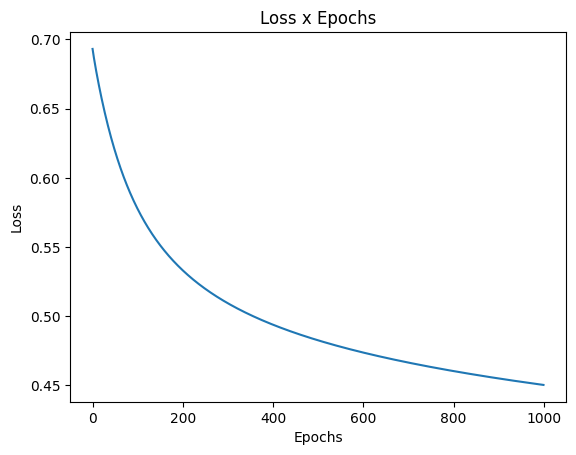

In [6]:
import matplotlib.pyplot as plt
plt.plot(hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss x Epochs')
plt.show()

### Assignment 2 (4 scores):

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [7]:
data_2 = pd.read_csv('data.csv', sep = ';')

mapping = {'Graduate': 2, 'Enrolled': 1, 'Dropout': 0}

data_2['Target'] = data_2['Target'].map(mapping)
y_2 = data_2['Target'].values.reshape(-1, 1)
x_2 = data_2.drop(columns = ['Target'])
x_2 = (x_2 - x_2.min()) / (x_2.max() - x_2.min())

In [8]:
class LogisticRegression_Softmax:
    def __init__(self):
        self.w = None
        self.b = None
    
    @staticmethod
    def softmax(z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict(self, x):   
        y_pred = np.dot(x, self.w) + self.b
        return LogisticRegression_Softmax.softmax(y_pred)

    def loss(self, y, y_pred):
        length = len(y)
        return - (1/length) * np.sum(y * np.log(y_pred + 1e-8))

    def fit(self, x, y, lr, epochs):
        self.w = np.zeros((x.shape[1], 3))
        self.b = np.zeros((1, 3))
        hist = []
        classes, y_labels_int = np.unique(y_2, return_inverse=True)
        num_classes = len(classes)
        y_onehot = np.zeros((x_2.shape[0], num_classes))
        y_onehot[np.arange(x_2.shape[0]), y_labels_int] = 1

        for epoch in range(epochs):
            y_pred = self.predict(x)
            delta_w = (1/x.shape[0]) * np.dot(x.T, (y_onehot-y_pred))
            delta_b = (1/x.shape[0]) * np.sum(y_onehot-y_pred, axis=0, keepdims=True)
            self.w += lr * delta_w
            self.b += lr * delta_b
            loss = self.loss(y_onehot, y_pred)
            hist.append(loss)
            print(f"Epoch {epoch+1}/{epochs}, Loss:{loss}")

        return self.w, self.b, hist


In [9]:
epochs = 1000
length = len(y)
w_2 = np.zeros(length)
b_2 = 0
learning_rate = 0.1
hist = []

lr_softmax = LogisticRegression_Softmax()
w_2, b_2, hist = lr_softmax.fit(x_2, y_2, learning_rate, epochs)



Epoch 1/1000, Loss:1.0986122586681102
Epoch 2/1000, Loss:1.06034616095157
Epoch 3/1000, Loss:1.035626380778077
Epoch 4/1000, Loss:1.0192800705190355
Epoch 5/1000, Loss:1.0080066547478772
Epoch 6/1000, Loss:0.9997900434100256
Epoch 7/1000, Loss:0.9934267712770857
Epoch 8/1000, Loss:0.9882048331937368
Epoch 9/1000, Loss:0.9837027793182646
Epoch 10/1000, Loss:0.9796693857936465
Epoch 11/1000, Loss:0.9759530992348967
Epoch 12/1000, Loss:0.9724610207896678
Epoch 13/1000, Loss:0.9691350869927371
Epoch 14/1000, Loss:0.9659381829550656
Epoch 15/1000, Loss:0.962845984787555
Epoch 16/1000, Loss:0.9598421167560388
Epoch 17/1000, Loss:0.9569152381211459
Epoch 18/1000, Loss:0.9540572633638381
Epoch 19/1000, Loss:0.9512622556972818
Epoch 20/1000, Loss:0.9485257260607924
Epoch 21/1000, Loss:0.9458441802124167
Epoch 22/1000, Loss:0.9432148203240154
Epoch 23/1000, Loss:0.9406353446273373
Epoch 24/1000, Loss:0.9381038105093873
Epoch 25/1000, Loss:0.9356185394670025
Epoch 26/1000, Loss:0.9331780501914729

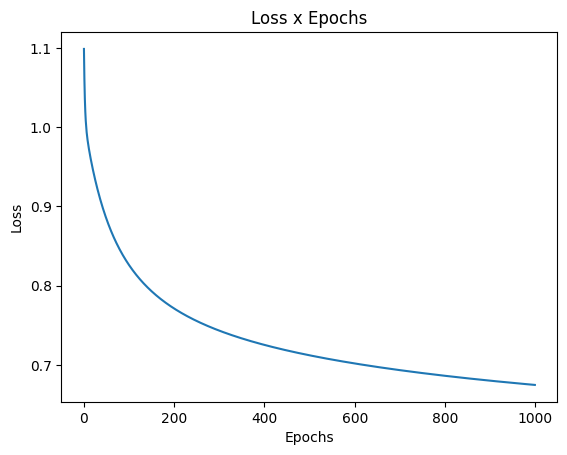

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss x Epochs')
plt.show()

### Assignment 3 (2 scores):

- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Logistic Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Softmax Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

In [13]:
binary_lr = LogisticRegression()
binary_lr.fit(x_train, y_train)
y_pred = binary_lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8305084745762712


In [14]:
#multi_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

multi_lr = LogisticRegression(solver='lbfgs')

multi_lr.fit(x_2_train, y_2_train.ravel())
y_2_pred = multi_lr.predict(x_2_test)
print("Accuracy: ", accuracy_score(y_2_test, y_2_pred))

Accuracy:  0.7491525423728813
